# Task 7

**The purpose of the work: to learn how to** learn to compare the means of independent samples in a situation where there are more than two groups.

Use the data from Lab #2 (your chosen dataset). Choose a response variable and two independent factors. Perform a two-way analysis of variance.
NOTE! To solve this problem, you can choose any other dataset.

### Variant 2
Because my student ID number is 8ПМ32422


## Task 1

Over the course of six years, five different technologies for growing crops have been used. Yield data (in kg / ha) are given in the table. It is necessary at the significance level a = 0.05 to establish the effect of various technologies on crop productivity

| Technologies \ Years | 1   | 2   | 3   | 4   | 5   | 6   |
|----------------------|-----|-----|-----|-----|-----|-----|
| A1                   | 1,2 | 1,2 | 1,0 | 1,3 | 1,1 | 0,8 |
| A2                   | 0,6 | 1,1 | 0,8 | 0,7 | 0,7 | 0,9 |
| A3                   | 0,9 | 0,6 | 0,8 | 1,0 | 1,0 | 1,1 |
| A4                   | 1,7 | 1,4 | 1,3 | 1,5 | 1,2 | 1,3 |
| A5                   | 1,0 | 1,4 | 1,1 | 0,9 | 1,2 | 1,5 |







In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
A1 = np.array([1.2, 1.2, 1.0, 1.3, 1.1, 0.8])
A2 = np.array([0.6, 1.1, 0.8, 0.7, 0.7, 0.9])
A3 = np.array([0.9, 0.6, 0.8, 1.0, 1.0, 1.1])
A4 = np.array([1.7, 1.4, 1.3, 1.5, 1.2, 1.3])
A5 = np.array([1.0, 1.4, 1.1, 0.9, 1.2, 1.5])

df = pd.DataFrame.from_dict({
    'year': range(1, 7),
    'A1': A1,
    'A2': A2,
    'A3': A3,
    'A4': A4,
    'A5': A5,
})

df

,year,A1,A2,A3,A4,A5
0,1,1.2,0.6,0.9,1.7,1.0
1,2,1.2,1.1,0.6,1.4,1.4
2,3,1.0,0.8,0.8,1.3,1.1
3,4,1.3,0.7,1.0,1.5,0.9
4,5,1.1,0.7,1.0,1.2,1.2
5,6,0.8,0.9,1.1,1.3,1.5


In [71]:
df = df.melt(id_vars=['year'], var_name='tech', value_vars=['A1', 'A2', 'A3', 'A4', 'A5'], value_name='productivity')
df

,year,tech,productivity
0,1,A1,1.2
1,2,A1,1.2
2,3,A1,1.0
3,4,A1,1.3
4,5,A1,1.1
5,6,A1,0.8
6,1,A2,0.6
7,2,A2,1.1
8,3,A2,0.8
9,4,A2,0.7


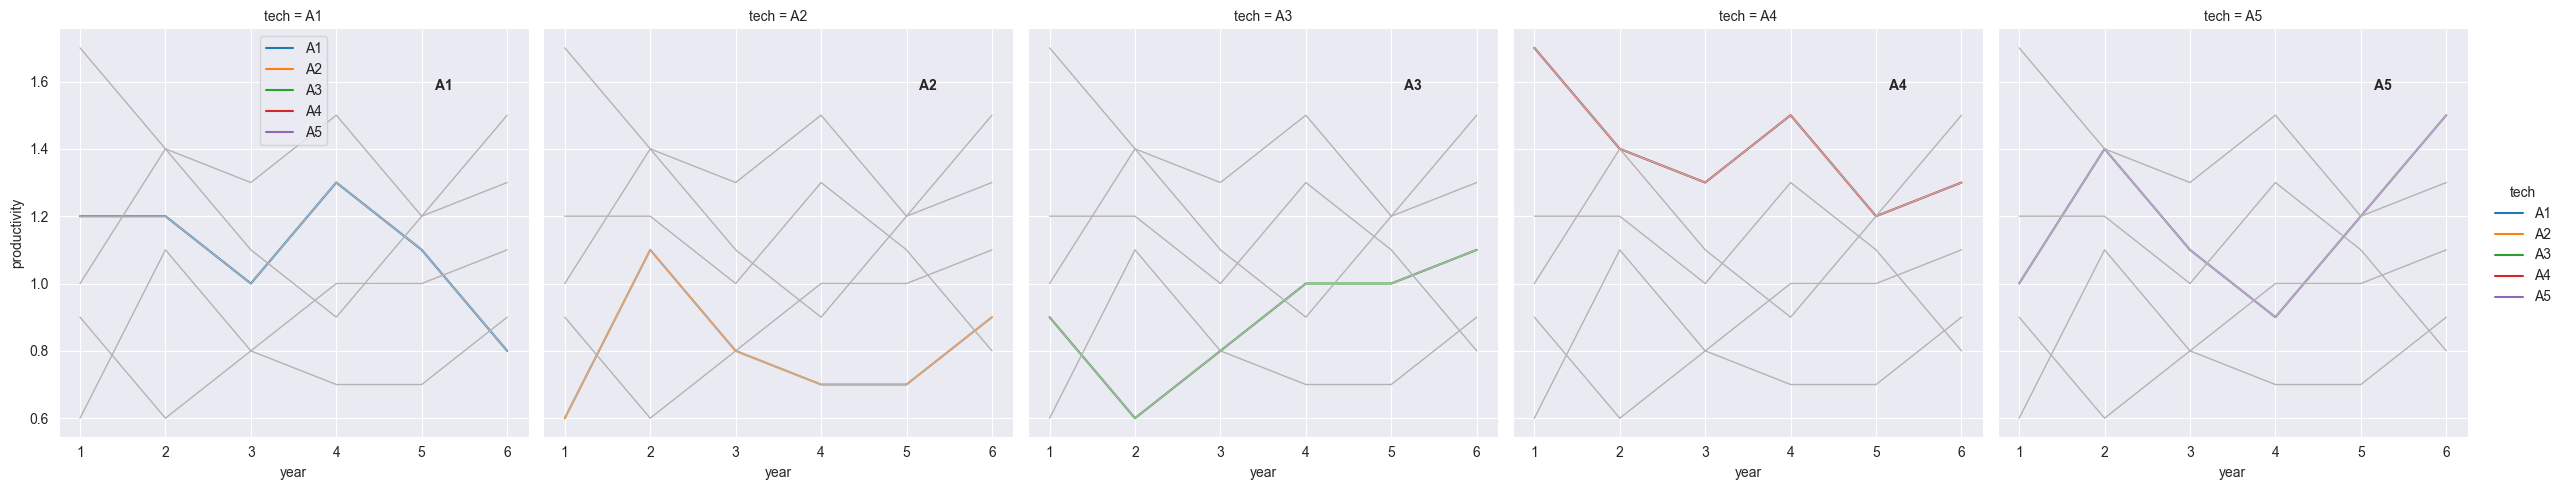

In [72]:
g = sns.relplot(data=df, x='year', y='productivity', col='tech', hue='tech', kind='line')

for year, ax in g.axes_dict.items():
    ax.text(0.8, 0.85, year, transform=ax.transAxes, fontweight='bold')
    sns.lineplot(
        data=df, x='year', y='productivity', units='tech', estimator=None, color='.7', linewidth=1, ax=ax
    )

In [73]:
df_t = df.pivot(index='year', columns='tech')['productivity']
df_t

tech,A1,A2,A3,A4,A5
year,,,,,
1,1.2,0.6,0.9,1.7,1.0
2,1.2,1.1,0.6,1.4,1.4
3,1.0,0.8,0.8,1.3,1.1
4,1.3,0.7,1.0,1.5,0.9
5,1.1,0.7,1.0,1.2,1.2
6,0.8,0.9,1.1,1.3,1.5


### ANOVA 1way

H0: The average productivity is the same for all technologies.
<br>
H1: The average yield of at least one technology differs.

alpha = 0.05

In [74]:
import scipy.stats as stats

f_statistic, p_value = stats.f_oneway(df_t['A1'], df_t['A2'], df_t['A3'], df_t['A4'], df_t['A5'])
(f_statistic, p_value)

(9.256880733944948, 9.872183891122161e-05)

In [75]:
alpha = 0.05
p_value < alpha

True

Reject the null hypothesis. Technology affects productivity.

### ANOVA 2ways

H0A: The technology does not affect productivity.
<br>
H0B: The year does not affect productivity.
<br>
H0AB: There is no interaction between technology and year.

In [76]:
df['tech'] = df['tech'].astype('category')
df['year'] = df['year'].astype('category')

In [89]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

ols_model = ols('productivity ~ C(tech) + C(year) + C(tech) : C(year)', data=df).fit()

anova_lm(ols_model, typ=2)

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: array must not contain infs or NaNs

may be dataset is very small for this method

In [98]:
df_bootstrapped = pd.concat([df] * 2, ignore_index=True)

In [99]:
ols_model = ols('productivity ~ C(tech) + C(year) + C(tech) : C(year)', data=df_bootstrapped).fit()

anova_lm(ols_model, typ=2)

,sum_sq,df,F,PR(>F)
C(tech),2.690667e+00,4.0,5.940479e+29,0.0
C(year),1.313333e-01,5.0,2.319672e+28,0.0
C(tech):C(year),1.685333e+00,20.0,7.441790e+28,0.0
Residual,3.397032e-29,30.0,NaN,NaN


all hypothesis is approved)
i think it is a wrong way